In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import wmfdata as wmf

You can find the source for `wmfdata` at https://github.com/neilpquinn/wmfdata


In [3]:
%matplotlib inline

mpl.rcParams["font.size"] = 16
mpl.rcParams["figure.figsize"] = (14, 7)

def M_str(x, pos):
    n = int(round(x / 1000000))
    return "{n} M".format(n=n)

pct_fmt = mpl.ticker.PercentFormatter(xmax=1)
M_fmt = mpl.ticker.FuncFormatter(M_str)
comma_fmt = mpl.ticker.StrMethodFormatter("{x:,.0f}")

In [5]:
m = pd.read_csv(
    "../metrics/metrics.tsv", 
    sep="\t",
    parse_dates=["month"]
).set_index("month")

# Monthly active editors

In [6]:
m["existing_active_editors"] = m["active_editors"] - m["new_active_editors"] - m["second_month_active_editors"]
m = m.drop("active_editors", axis = 1)
eds = m[["existing_active_editors", "second_month_active_editors", "new_active_editors"]]

In [7]:
eds.columns = ['existing active editors', 'second month active editors',
       'new (first-month) active editors']
eds.tail()

,existing active editors,second month active editors,new (first-month) active editors
month,,,
2017-12-01,61019.0,4152.0,14387.0
2018-01-01,64391.0,3353.0,16678.0
2018-02-01,59777.0,4134.0,15052.0
2018-03-01,64218.0,4347.0,17625.0
2018-04-01,62907.0,4739.0,16059.0


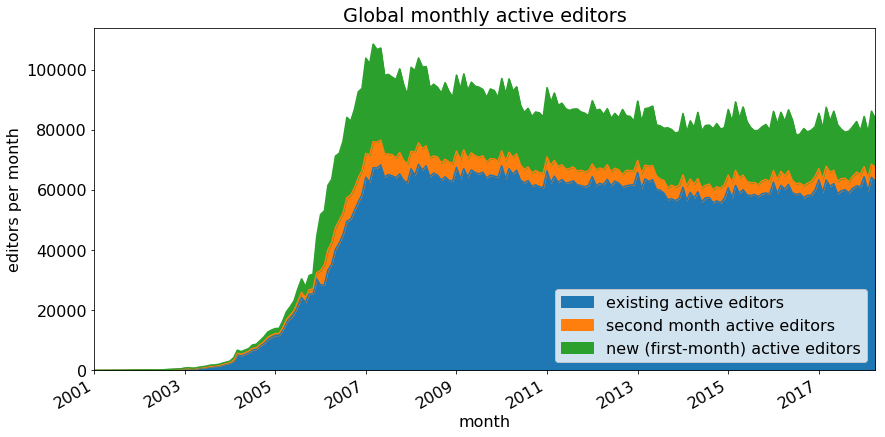

In [8]:
ax = eds.plot.area()
plt.title("Global monthly active editors")
plt.ylabel("editors per month")
plt.autoscale(enable=True, axis="x", tight=True);